In [4]:
import numpy as np
from numpy.polynomial import Polynomial
import pandas as pd
import matplotlib.pyplot as plt

## **Theories**

---

### **Part 1: The Theory of Numerical Differentiation**

Numerical differentiation provides methods to approximate the derivative of a function, $f'(x)$, using its values at discrete points. These methods are derived from the limit definition of a derivative by using a small, finite step size, $h$. The accuracy of each method is determined by its **truncation error**, which is the part of the Taylor series expansion that is ignored in the approximation.

#### **A. The Fundamental Formulas and Their Errors**

The three primary finite difference formulas are derived from the Taylor series expansion of $f(x+h)$ and $f(x-h)$ around a point $x$.

1.  **Forward Difference:**
    This approximation is derived by truncating the Taylor series of $f(x+h)$ after the linear term.
    *   **Formula:** $$ f'(x) \approx \frac{f(x+h) - f(x)}{h} $$
    *   **Error Analysis:** The truncation error is the first term we ignore, which is proportional to $h$.
        $$ \text{Error} = -\frac{h}{2}f''(x) - \frac{h^2}{6}f'''(x) - \dots $$
    *   **Order of Accuracy:** This is a **first-order** method, denoted as **$O(h)$**. Intuitively, this means the error is directly proportional to the step size. If you make the step size 10 times smaller, the error will also become about 10 times smaller. This is relatively inaccurate.

2.  **Backward Difference:**
    This method is derived similarly from the Taylor series of $f(x-h)$.
    *   **Formula:** $$ f'(x) \approx \frac{f(x) - f(x-h)}{h} $$
    *   **Error Analysis:** The truncation error is also proportional to $h$.
        $$ \text{Error} = +\frac{h}{2}f''(x) - \frac{h^2}{6}f'''(x) + \dots $$
    *   **Order of Accuracy:** This is also a **first-order** method, **$O(h)$**. Its accuracy is comparable to the forward difference method, though the error may have the opposite sign.

3.  **Central Difference:**
    This superior approximation is derived by subtracting the Taylor series for $f(x-h)$ from the series for $f(x+h)$. This process cleverly cancels out the error terms containing even powers of $h$.
    *   **Formula:** $$ f'(x) \approx \frac{f(x+h) - f(x-h)}{2h} $$
    *   **Error Analysis:** After the subtraction and division by $2h$, the first error term that remains is the one containing $h^2$.
        $$ \text{Error} = -\frac{h^2}{6}f'''(x) - \frac{h^4}{120}f^{(5)}(x) - \dots $$
    *   **Order of Accuracy:** This is a **second-order** method, **$O(h^2)$**. This is a significant improvement. It means the error is proportional to the **square** of the step size. If you make the step size 10 times smaller, the error becomes about 100 times smaller. For this reason, the central difference method is almost always preferred over the forward or backward methods when possible.

---

---

### **Part 2: The Theory of Richardson Extrapolation**

The core idea behind Richardson Extrapolation is to **use the error itself to cancel out the error.** We know our central difference formula is good, but it's not perfect. It has a predictable error structure. Richardson Extrapolation exploits this predictability to produce a new, much more accurate formula.

#### **A. Understanding the Error Structure**

From the Taylor series, we established that the Central Difference approximation, which we'll call $D(h)$, isn't exactly equal to the true derivative, $f'(x)$. Instead, it's an infinite series:

$$ D(h) = f'(x) + C_1h^2 + C_2h^4 + C_3h^6 + \dots $$

Here, $C_1, C_2, C_3, \dots$ are constants that depend on the higher-order derivatives of the function at the point $x$, but they **do not depend on $h$**.

For a small step size $h$, the term $C_1h^2$ is the largest and most significant part of our error. The terms $C_2h^4$, $C_3h^6$, etc., are much smaller. Our goal is to eliminate this dominant $O(h^2)$ error term.

#### **B. The "Two Step Sizes" Strategy**

Let's write down our approximation for two different step sizes: a full step, $h$, and a half step, $h/2$.

1.  **Approximation with step size $h$:**
    $$ D(h) \approx f'(x) + C_1h^2 $$
    *(We are ignoring the $O(h^4)$ and higher terms for now, as they are very small.)*

2.  **Approximation with step size $h/2$:**
    $$ D(h/2) \approx f'(x) + C_1\left(\frac{h}{2}\right)^2 = f'(x) + \frac{1}{4}C_1h^2 $$
    *(Notice the error term became four times smaller, as expected for an $O(h^2)$ method.)*

#### **C. The Extrapolation: Eliminating the Error**

We now have two different estimates for the same true value, $f'(x)$, and we know how their errors relate to each other. We can treat this like a simple system of two equations and two unknowns (the unknowns being the true value $f'(x)$ and the error coefficient $C_1$).

Let's try to cancel out the $C_1h^2$ term. If we multiply the second equation by 4, the error terms become equal:

$$ 4 \cdot D(h/2) \approx 4f'(x) + C_1h^2 $$

Now, look what happens when we subtract the first equation from this new one:

$$ \begin{array}{rcrcrcr} & 4 D(h/2) & \approx & 4f'(x) & + & C_1h^2 & \\ - & (D(h) & \approx & f'(x) & + & C_1h^2 & ) \\ \hline & 4D(h/2) - D(h) & \approx & 3f'(x) & + & 0 & \\ \end{array} $$

The $O(h^2)$ error term has been completely eliminated! By rearranging this, we get a new, much better formula for the true derivative:

$$ f'(x) \approx \frac{4D(h/2) - D(h)}{3} $$

This is the Richardson Extrapolation formula for an $O(h^2)$ method.

#### **D. The New, Improved Error**

What happened to the $O(h^4)$ error term that we initially ignored? It didn't disappear. The same algebraic process that eliminated the $h^2$ term also modified the $h^4$ term. After doing the full math, our new formula, which we'll call $D_1(h)$, looks like this:

$$ D_1(h) = f'(x) + K_1h^4 + K_2h^6 + \dots $$
*(where $K_1$ is a new constant related to the original $C_2$)*

The order of accuracy has jumped from **$O(h^2)$** to **$O(h^4)$**.

**The Intuitive Payoff:**
*   With the **Central Difference** method, halving your step size `h` makes your answer about **4 times** more accurate.
*   With **Richardson Extrapolation**, halving your step size `h` makes your answer about **16 times** more accurate.

This is a massive gain in precision for a very small amount of extra computation (just one extra evaluation at $h/2$). This is why Richardson Extrapolation is such a fundamental and powerful technique in numerical analysis.

---

## **Implementation**

In [6]:
# The Basic Differentiation Functions. They form the baseline against which we will compare our more advanced methods using Richardson Extrapolation.

def forward_diff(f, h, x):
  """
  Calculates the derivative using the forward difference formula.
  Error is O(h).
  """
  return (f(x + h) - f(x)) / h

def backward_diff(f, h, x):
  """
  Calculates the derivative using the backward difference formula.
  Error is O(h).
  """
  return (f(x) - f(x - h)) / h

def central_diff(f, h, x):
  """
  Calculates the derivative using the central difference formula.
  Error is O(h^2).
  """
  return (f(x + h) - f(x - h)) / (2 * h)

In [7]:
def dh(f, h, x):
  """
  The central difference approximation, D(h).
  This is our O(h^2) building block for Richardson extrapolation.
  (This function is identical to central_diff).
  """
  return (f(x + h) - f(x - h)) / (2 * h)

def dh1(f, h, x):
  """
  Calculates a more accurate derivative using one level of
  Richardson Extrapolation on the central difference formula.
  Error is O(h^4).
  """
  # Calculate the central difference with step h/2
  D_h_over_2 = dh(f, h / 2, x)

  # Calculate the central difference with step h
  D_h = dh(f, h, x)

  # Apply the Richardson Extrapolation formula
  return (4 * D_h_over_2 - D_h) / 3

In [8]:
# Finally, we need functions to quantify how much better our methods are.
# error_1 will loop through a list of decreasing step sizes (h values) and, for each h, calculate the error for the three basic methods.
# error_2 will do the same but compare the standard central difference (dh) with the Richardson-extrapolated version (dh1).


def error_1(f, f_prime, h_values, x_point):
  """
  Calculates the error for forward, backward, and central difference methods
  for a list of step sizes 'h'.
  """
  # Get the true, exact value of the derivative at the point
  y_actual = f_prime(x_point)

  f_errors = []
  b_errors = []
  c_errors = []

  for h in h_values:
    # Calculate the absolute error for each method and append to the list
    f_errors.append(abs(forward_diff(f, h, x_point) - y_actual))
    b_errors.append(abs(backward_diff(f, h, x_point) - y_actual))
    c_errors.append(abs(central_diff(f, h, x_point) - y_actual))

  # Return the lists of errors
  return f_errors, b_errors, c_errors

def error_2(f, f_prime, hs, x_i):
  """
  Calculates the error for central difference (dh) and Richardson
  extrapolation (dh1) for a list of step sizes 'hs'.
  """
  # Get the true, exact value
  y_actual = f_prime(x_i)

  diff_errors = []
  diff2_errors = []

  for h in hs:
    # Calculate and append the absolute error for each method
    diff_errors.append(abs(dh(f, h, x_i) - y_actual))
    diff2_errors.append(abs(dh1(f, h, x_i) - y_actual))

  # Using a DataFrame makes the output easy to read
  print("--- Error Comparison at x =", x_i, "---")
  error_df = pd.DataFrame({
    "h": hs,
    "Central Diff Error (dh)": diff_errors,
    "Richardson Error (dh1)": diff2_errors
  })
  display(error_df)

  return diff_errors, diff2_errors

## **Comprehensive Analysis of Numerical Differentiation**



You are given the polynomial function:
$$ f(x) = 1.5x^5 + 3x^4 - 10x^3 - 14x^2 + 4x + 3 $$

Your task is to perform a complete analysis of the numerical differentiation methods at the point **`x = 2.0`**.

**Part A: Visualizing the Approximations (3 Plots)**

1.  **Plot 1 (Large Step Size, h=0.5):** Generate a plot that includes:
    *   The true analytical derivative, $f'(x)$.
    *   The Forward Difference approximation.
    *   The Backward Difference approximation.
    *   The Central Difference approximation.
    All curves should be plotted over the domain `[-2.2, 2.3]` with `h=0.5`.

2.  **Plot 2 (Small Step Size, h=0.01):** Generate the same plot as above, but with a much smaller step size `h=0.01`. Observe how the approximations improve.

3.  **Plot 3 (Richardson Extrapolation):** Generate a plot that includes:
    *   The true analytical derivative, $f'(x)$.
    *   The Richardson Extrapolation approximation (`dh1`).
    Plot this over the domain `[-2.5, 2.0]` using `h=0.1`.

**Part B: Quantitative Error Analysis (2 Plots)**

1.  **Plot 4 (Error vs. h for Basic Methods):** Generate a plot that shows the absolute error of the Forward, Backward, and Central difference methods as a function of step size `h`.
    *   Use the point `x_i = 2.0`.
    *   Use the `h` values: `[3.5, 0.55, 0.3, 0.17, 0.1, 0.055, 0.03, 0.017, 0.01]`.
    *   Plot `h` on the x-axis and the absolute error on the y-axis.

2.  **Plot 5 (Error vs. h for Advanced Methods):** Generate a similar plot showing the absolute error of the Central Difference (`dh`) vs. Richardson Extrapolation (`dh1`).
    *   Use the same point `x_i = 2.0` and the same list of `h` values.
    *   This plot should visually demonstrate the superior convergence rate of Richardson Extrapolation.

--- Generating Plot 1: Large Step Size (h=0.5) ---


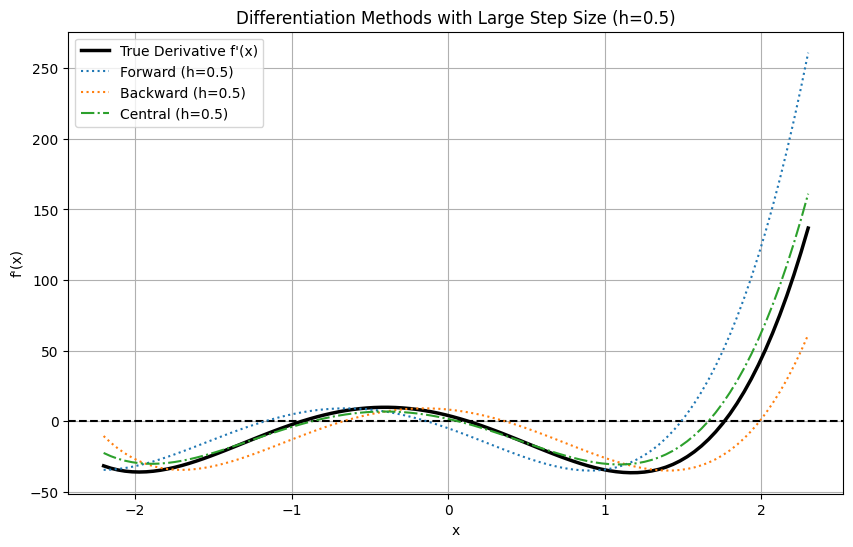


--- Generating Plot 2: Small Step Size (h=0.01) ---


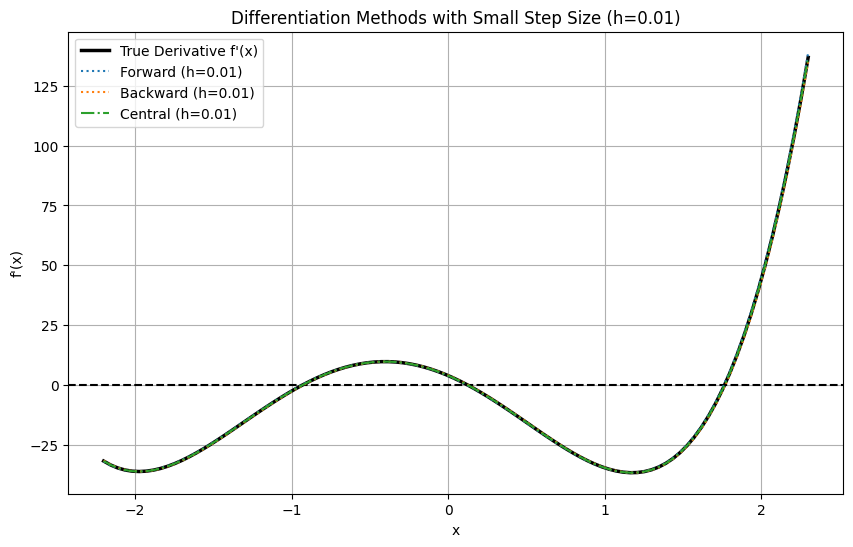


--- Generating Plot 3: Richardson Extrapolation (h=0.1) ---


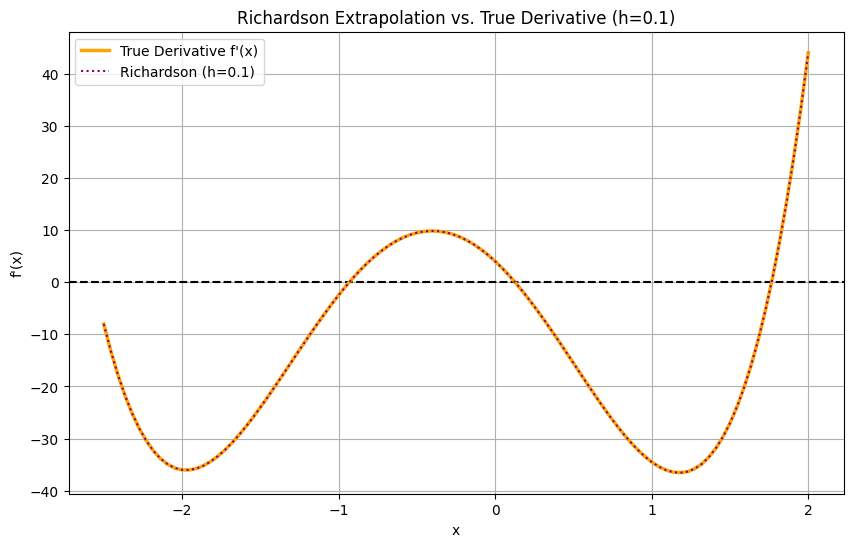


--- Generating Plot 4: Error of Basic Methods ---


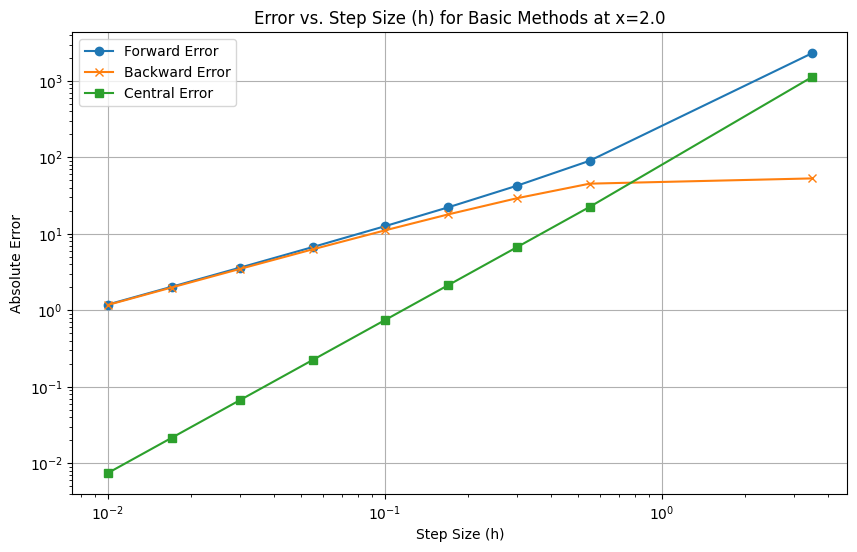


--- Generating Plot 5: Error of Advanced Methods ---
--- Error Comparison at x = 2.0 ---


,h,Central Diff Error (dh),Richardson Error (dh1)
0,3.500,1131.593750,5.627344e+01
1,0.550,22.522259,3.431484e-02
2,0.300,6.672150,3.037500e-03
3,0.170,2.139853,3.132038e-04
4,0.100,0.740150,3.750000e-05
5,0.055,0.223864,3.431485e-06
6,0.030,0.066601,3.037501e-07
7,0.017,0.021386,3.131791e-08
8,0.010,0.007400,3.749470e-09


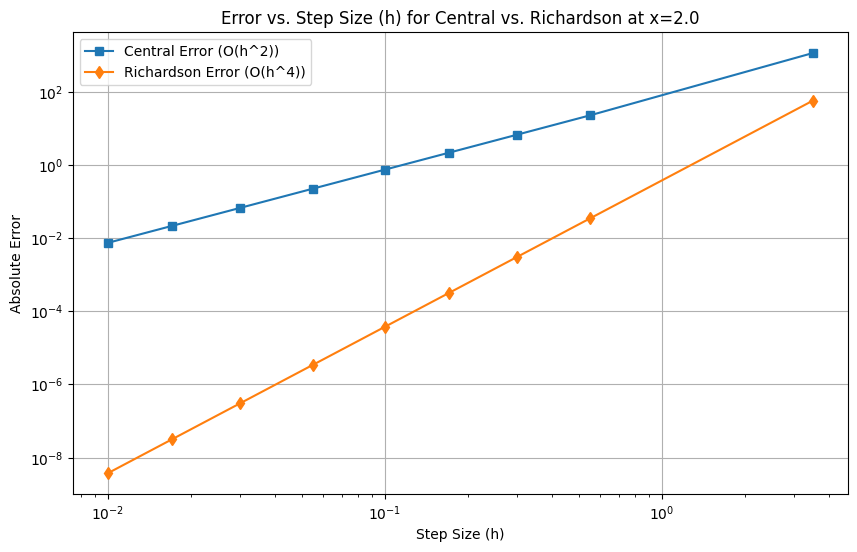

In [12]:
#==============================================================================
# Setup: Define the function and its true derivative
#==============================================================================
# f(x) = 1.5x^5 + 3x^4 - 10x^3 - 14x^2 + 4x + 3
p = Polynomial([3.0, 4.0, -14.0, -10.0, 3.0, 1.5])
p_prime = p.deriv(1)

#==============================================================================
# Part A: Visualizing the Approximations
#==============================================================================

# --- Plot 1: Approximations with Large Step Size h=0.5 ---
print("--- Generating Plot 1: Large Step Size (h=0.5) ---")
h_large = 0.5
x_domain1 = np.linspace(-2.2, 2.3, 100)

plt.figure(figsize=(10, 6))
plt.axhline(y=0, color='k', linestyle='--') # Add x-axis for reference

# Plot the true derivative
plt.plot(x_domain1, p_prime(x_domain1), label='True Derivative f\'(x)', color='black', linewidth=2.5)

# Plot the approximations
plt.plot(x_domain1, forward_diff(p, h_large, x_domain1), label=f'Forward (h={h_large})', linestyle=':')
plt.plot(x_domain1, backward_diff(p, h_large, x_domain1), label=f'Backward (h={h_large})', linestyle=':')
plt.plot(x_domain1, central_diff(p, h_large, x_domain1), label=f'Central (h={h_large})', linestyle='-.')

plt.title('Differentiation Methods with Large Step Size (h=0.5)')
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.legend()
plt.grid(True)
plt.show()


# --- Plot 2: Approximations with Small Step Size h=0.01 ---
print("\n--- Generating Plot 2: Small Step Size (h=0.01) ---")
h_small = 0.01
x_domain2 = np.linspace(-2.2, 2.3, 100)

plt.figure(figsize=(10, 6))
plt.axhline(y=0, color='k', linestyle='--')

# Plot the true derivative
plt.plot(x_domain2, p_prime(x_domain2), label='True Derivative f\'(x)', color='black', linewidth=2.5)

# Plot the approximations
plt.plot(x_domain2, forward_diff(p, h_small, x_domain2), label=f'Forward (h={h_small})', linestyle=':')
plt.plot(x_domain2, backward_diff(p, h_small, x_domain2), label=f'Backward (h={h_small})', linestyle=':')
plt.plot(x_domain2, central_diff(p, h_small, x_domain2), label=f'Central (h={h_small})', linestyle='-.')

plt.title('Differentiation Methods with Small Step Size (h=0.01)')
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.legend()
plt.grid(True)
plt.show()


# --- Plot 3: Richardson Extrapolation ---
print("\n--- Generating Plot 3: Richardson Extrapolation (h=0.1) ---")
h_richardson = 0.1
x_domain3 = np.linspace(-2.5, 2.0, 100)

plt.figure(figsize=(10, 6))
plt.axhline(y=0, color='k', linestyle='--')

# Plot the true derivative
plt.plot(x_domain3, p_prime(x_domain3), label='True Derivative f\'(x)', color='orange', linewidth=2.5)

# Plot the Richardson approximation
plt.plot(x_domain3, dh1(p, h_richardson, x_domain3), label=f'Richardson (h={h_richardson})', color='purple', linestyle=':')

plt.title('Richardson Extrapolation vs. True Derivative (h=0.1)')
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.legend()
plt.grid(True)
plt.show()


#==============================================================================
# Part B: Quantitative Error Analysis
#==============================================================================

# Define the point and step sizes for analysis
x_point_err = 2.0
h_err_values = np.array([3.5, 0.55, 0.3, 0.17, 0.1, 0.055, 0.03, 0.017, 0.01])

# --- Plot 4: Error of Basic Methods ---
print("\n--- Generating Plot 4: Error of Basic Methods ---")
f_err, b_err, c_err = error_1(p, p_prime, h_err_values, x_point_err)

plt.figure(figsize=(10, 6))
plt.plot(h_err_values, f_err, label='Forward Error', marker='o')
plt.plot(h_err_values, b_err, label='Backward Error', marker='x')
plt.plot(h_err_values, c_err, label='Central Error', marker='s')

plt.title('Error vs. Step Size (h) for Basic Methods at x=2.0')
plt.xlabel('Step Size (h)')
plt.ylabel('Absolute Error')
# Using a log scale for the y-axis makes the differences much clearer
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()


# --- Plot 5: Error of Advanced Methods ---
print("\n--- Generating Plot 5: Error of Advanced Methods ---")
# The error_2 function already prints the table, which is useful
central_err, richardson_err = error_2(p, p_prime, h_err_values, x_point_err)

plt.figure(figsize=(10, 6))
plt.plot(h_err_values, central_err, label='Central Error (O(h^2))', marker='s')
plt.plot(h_err_values, richardson_err, label='Richardson Error (O(h^4))', marker='d')

plt.title('Error vs. Step Size (h) for Central vs. Richardson at x=2.0')
plt.xlabel('Step Size (h)')
plt.ylabel('Absolute Error')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()